In [1]:
import numpy as np

import heapq

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

from keras.models import Sequential, load_model

from keras.layers.core import Dense, Activation

from keras.layers import LSTM

import pickle

from tensorflow.keras.optimizers import RMSprop

In [2]:
# path = './data.txt'
# text = open(path,'r', encoding="utf8").read().lower()
# print('length of the corpus is: :', len(text))
# text[:100]

text = "aaa bbb ccc ddd eee fff ggg hhh iii jjj kkk lll mmm nnn ooo ppp qqq rrr sss ttt uuu vvv www xxx yyy zzz"
text = "aaa bbb ccc ddd eee fff ggg hhh iii jjj kkk lll mmm nnn"

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words[:50]

['aaa',
 'bbb',
 'ccc',
 'ddd',
 'eee',
 'fff',
 'ggg',
 'hhh',
 'iii',
 'jjj',
 'kkk',
 'lll',
 'mmm',
 'nnn']

In [19]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

unique_word_index

{'aaa': 0,
 'bbb': 1,
 'ccc': 2,
 'ddd': 3,
 'eee': 4,
 'fff': 5,
 'ggg': 6,
 'hhh': 7,
 'iii': 8,
 'jjj': 9,
 'kkk': 10,
 'lll': 11,
 'mmm': 12,
 'nnn': 13}

In [20]:
LENGTH_WORD = 3
next_words = []
prev_words = []
for j in range(len(words) - LENGTH_WORD):
     prev_words.append(words[j:j + LENGTH_WORD])
     next_words.append(words[j + LENGTH_WORD])
print(prev_words[0])
print(next_words[0])

['aaa', 'bbb', 'ccc']
ddd


In [6]:
np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=bool)

array([[[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, Fa

In [110]:
X = np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

for i, each_words in enumerate(prev_words):
    print(f"111 each_words: {each_words} {i}")
    for j, each_word in enumerate(each_words):
        print(f"\t222 each_word: {each_word} unique_word_index[each_word] {unique_word_index[each_word]}")
        X[i, j, unique_word_index[each_word]] = 1
    print(f"next_words[i] {next_words[i]}, unique_word_index[next_words[i]] {unique_word_index[next_words[i]]}")
#     Y[i, unique_word_index[next_words[i]]] = 1
    Y[i] = unique_words == next_words[i]
    
#     print(unique_words == next_words[i])
    print("111 ---", X[i])
    print("222 ---", Y[i])


111 each_words: ['aaa', 'bbb', 'ccc'] 0
	222 each_word: aaa unique_word_index[each_word] 0
	222 each_word: bbb unique_word_index[each_word] 1
	222 each_word: ccc unique_word_index[each_word] 2
next_words[i] ddd, unique_word_index[next_words[i]] 3
111 --- [[ True False False False False False False False False False False False
  False False]
 [False  True False False False False False False False False False False
  False False]
 [False False  True False False False False False False False False False
  False False]]
222 --- [False False False  True False False False False False False False False
 False False]
111 each_words: ['bbb', 'ccc', 'ddd'] 1
	222 each_word: bbb unique_word_index[each_word] 1
	222 each_word: ccc unique_word_index[each_word] 2
	222 each_word: ddd unique_word_index[each_word] 3
next_words[i] eee, unique_word_index[next_words[i]] 4
111 --- [[False  True False False False False False False False False False False
  False False]
 [False False  True False False False 

In [111]:
X

array([[[ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False]],

       [[False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False]],

       [[False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False,  True, False, False, Fa

In [112]:
Y

array([[False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
         True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        F

In [25]:
model = Sequential()
model.add(LSTM(128, input_shape=(LENGTH_WORD, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

model

In [41]:
optimizer = RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 7.0954 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 7.4034 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 7.6359 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 7.8250 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 7.9844 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 8.1258 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 8.2524 - val_accuracy: 0.0000e+00
E

In [42]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

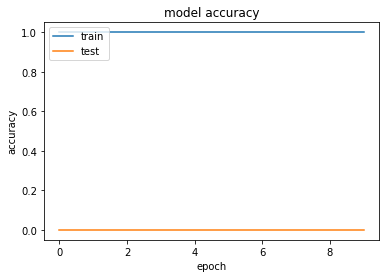

In [43]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

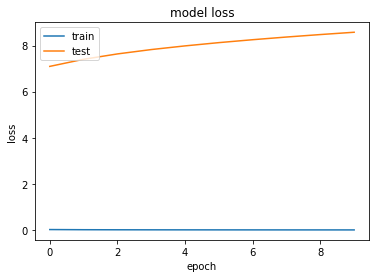

In [44]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [45]:
def prepare_input(text):
    x = np.zeros((1, LENGTH_WORD, len(unique_words)))
    for t, word in enumerate(tokenizer.tokenize(text)[:LENGTH_WORD]):
#         print(word, t)
        if unique_word_index.get(word) != None:
            x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [46]:
np.zeros((1, 5, 3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [85]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [116]:
def predict_completions(text, n=3):
    print(f"text: {text}")
    x = prepare_input(text)

    preds = model.predict(x, verbose=0)[0]
    
    print(f"preds: {[format(x, '.6f') for x in preds]}")

    next_indices = sample(preds, n)
    
#     print(f"next_indices: {next_indices} {len(next_indices)}")

#     next_tokens = tokenizer.tokenize(text)[1:]

#     print(f"next_tokens: {next_tokens}")

    return [unique_words[idx] for idx in next_indices]

In [119]:
# quotes = [
#     "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
#     "That which does not kill us makes us stronger.",
#     "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
#     "And those who were seen dancing were thought to be insane by those who could not hear the music.",
#     "It is hard enough to remember my opinions, without also remembering my reasons for them!"
# ]

quotes = [
    "aaa bbb ccc",
    "hhh iii jjj",
    "ccc ddd aaa",
    "aaa"
]

In [120]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

aaa bbb ccc
text: aaa bbb ccc
preds: ['0.000007', '0.000002', '0.000006', '0.997863', '0.001225', '0.000016', '0.000002', '0.000064', '0.000536', '0.000142', '0.000002', '0.000004', '0.000123', '0.000006']
['ddd', 'eee', 'iii', 'jjj', 'mmm']

hhh iii jjj
text: hhh iii jjj
preds: ['0.000001', '0.000001', '0.000001', '0.000001', '0.000003', '0.000062', '0.000098', '0.000002', '0.000001', '0.001374', '0.996791', '0.001661', '0.000004', '0.000001']
['kkk', 'lll', 'jjj', 'ggg', 'fff']

ccc ddd aaa
text: ccc ddd aaa
preds: ['0.000000', '0.000000', '0.000002', '0.000012', '0.004270', '0.994190', '0.001268', '0.000002', '0.000000', '0.000007', '0.000101', '0.000130', '0.000015', '0.000001']
['fff', 'eee', 'ggg', 'lll', 'kkk']

aaa
text: aaa
preds: ['0.000201', '0.000093', '0.000182', '0.971063', '0.001240', '0.000181', '0.000115', '0.003954', '0.015736', '0.004246', '0.000133', '0.000104', '0.002550', '0.000202']
['ddd', 'iii', 'jjj', 'hhh', 'mmm']



In [90]:
a = np.array([.1, .3, 1, .5, .05, 2])
a

array([0.1 , 0.3 , 1.  , 0.5 , 0.05, 2.  ])

In [92]:
a >= 1

array([False, False,  True, False, False,  True])

In [95]:
b = np.array([.5, 2])
b

array([0.5, 2. ])

In [107]:
d = np.intersect1d(a, b, return_indices=True)

d

(array([0.5, 2. ]), array([3, 5], dtype=int64), array([0, 1], dtype=int64))

In [108]:
c = np.zeros(len(a), dtype=bool)

np.put(c, d[1], d[0])

c

array([False, False, False,  True, False,  True])